# Final metrics

# Imports

In [13]:
import pandas as pd
from sklearn.metrics import classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from seaborn import heatmap
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read files

In [19]:
files = ["./BLACK/output_csv/results_v5.csv",
        "./BLUE/output_csv/results_v5.csv",
        "./CYAN/output_csv/results_v5.csv",
        "./GREEN/output_csv/results_v5.csv",
        "./MAGENTA/output_csv/results_v5.csv",
        "./RED/output_csv/results_v5.csv",
        "./WHITE/output_csv/results_v5.csv",
        "./YELLOW/output_csv/results_v5.csv"
    ]
model_names = ["BLACK", "BLUE", "CYAN", "GREEN", "MAGENTA", "RED", "WHITE", "YELLOW"]
dfs = [pd.read_csv(file) for file in files]
dfs[0].head()

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,Background,Background
1,I_CIDIMEC_Background_2.mp4,Background,Background
2,I_CIDIMEC_Background_3.mp4,Background,Background
3,I_CIDIMEC_Background_4.mp4,Background,Background
4,I_CIDIMEC_Gun_1.mp4,Gun,Background


## Encode files

In [20]:
for df in dfs:
    df['true_class'] = LabelEncoder().fit_transform(df['true_class'])
    df['pred_class'] = LabelEncoder().fit_transform(df['pred_class'])
dfs[0].head()    

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,0,0
1,I_CIDIMEC_Background_2.mp4,0,0
2,I_CIDIMEC_Background_3.mp4,0,0
3,I_CIDIMEC_Background_4.mp4,0,0
4,I_CIDIMEC_Gun_1.mp4,1,0


In [21]:
# iterate over number, dataframe and model_name
for i, (df, model_name) in enumerate(zip(dfs, model_names)):
    print("-"*30+f" Model {i+1}: {model_name} "+"-"*30)
    print(classification_report(df['true_class'], df['pred_class']))

------------------------------ Model 1: BLACK ------------------------------
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         8
           1       0.52      0.81      0.63        16
           2       0.67      0.12      0.21        16

    accuracy                           0.48        40
   macro avg       0.51      0.48      0.41        40
weighted avg       0.54      0.47      0.42        40

------------------------------ Model 2: BLUE ------------------------------
              precision    recall  f1-score   support

           0       0.27      0.75      0.40         8
           1       0.75      0.56      0.64        16
           2       1.00      0.38      0.55        16

    accuracy                           0.53        40
   macro avg       0.67      0.56      0.53        40
weighted avg       0.75      0.53      0.56        40

------------------------------ Model 3: CYAN ------------------------------
         

In [26]:
# Classification report as pd dataframe
headers = ['background', 'accuracy', 'precision', 'recall', 'f1-score', 'auc']
metrics_df = pd.DataFrame(columns=headers)

for i, (df, name) in enumerate(zip(dfs, model_names)):
    # print: accuracy, precision, recall, f1-score, auc
    metrics_df.loc[i] = [name,
                        round(accuracy_score(df['true_class'], df['pred_class']), 2),
                        round(precision_score(df['true_class'], df['pred_class'], average='macro'), 2),
                        round(recall_score(df['true_class'], df['pred_class'], average='macro'), 2),
                        round(f1_score(df['true_class'], df['pred_class'], average='macro'), 2),
                        round(roc_auc_score([1 if x > 0 else 0 for x in df['true_class']], df['pred_class']), 2)
                ]
metrics_df

,background,accuracy,precision,recall,f1-score,auc
0,BLACK,0.48,0.51,0.48,0.41,0.59
1,BLUE,0.52,0.67,0.56,0.53,0.65
2,CYAN,0.40,0.47,0.40,0.39,0.41
3,GREEN,0.42,0.52,0.44,0.40,0.49
4,MAGENTA,0.50,0.64,0.50,0.46,0.55
5,RED,0.42,0.61,0.44,0.44,0.49
6,WHITE,0.49,0.64,0.49,0.48,0.57
7,YELLOW,0.42,0.68,0.50,0.41,0.61


## Confusion matrixes

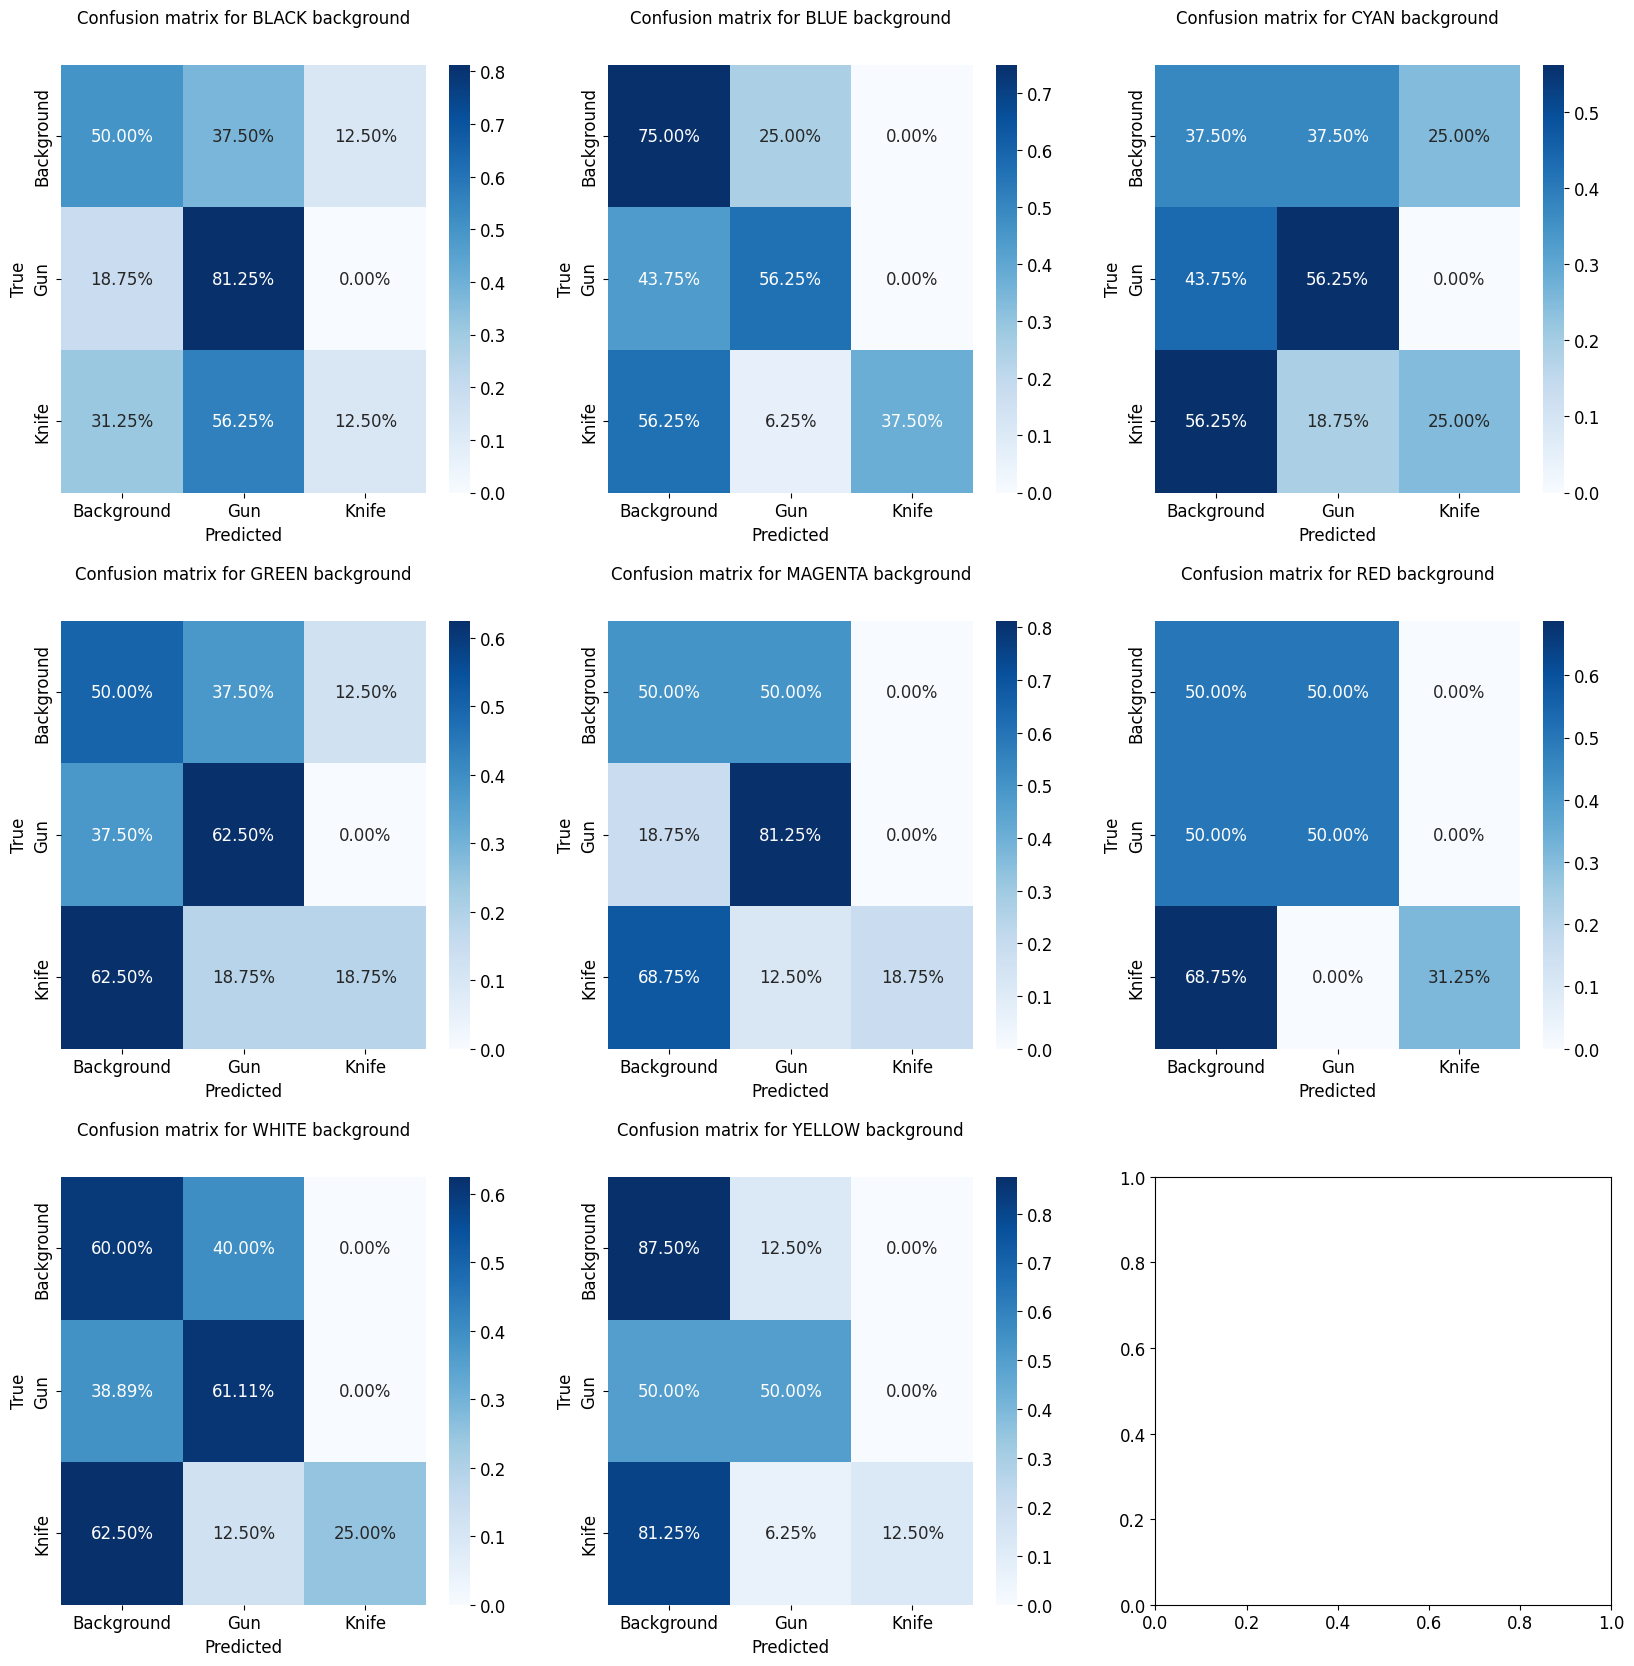

In [42]:
# Create a 3x3 matrix for figures
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
for df, name in zip(dfs, model_names):
    confusion_matrix_percentage = pd.crosstab(df['true_class'], df['pred_class'], rownames=['True'], colnames=['Predicted'], margins=True, normalize='index')
    plt.subplot(3, 3, model_names.index(name) + 1)
    # Change axes by classnames: ['Background', 'Gun, 'Knife']
    confusion_matrix_percentage = confusion_matrix_percentage.rename(columns={0: 'Background', 1: 'Gun', 2: 'Knife', 3: 'All'})
    confusion_matrix_percentage = confusion_matrix_percentage.rename(index={0: 'Background', 1: 'Gun', 2: 'Knife', 3: 'All'})

    # Remove all column and row with 'All' class
    confusion_matrix_percentage = confusion_matrix_percentage.drop('All', axis=0)

    # Change font size
    plt.rcParams.update({'font.size': 12})

    # Plot heatmap
    heatmap(confusion_matrix_percentage, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f"Confusion matrix for {name} background", pad=30, fontsize=12)
    